<a href="https://colab.research.google.com/github/GOPIVARDHAN1965/sentiment_analysis/blob/main/Internship_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifcation algorithm used- Naive Bayes

#Importing necessary libraries

In [ ]:
!pip install nltk  #nltk-Natural language processing tool kit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re #regular expressions used for working on string patterns
from nltk.corpus import stopwords #helps in removing the common english words
from nltk.stem.porter import PorterStemmer  #for stemming(reduces the count of words like returns the root word from its inflected word,reduces data usage, blindly operates on single word without having the idea of the context)
from sklearn.pipeline import Pipeline #here multiple instructions are overlapped.
from sklearn.feature_extraction.text import TfidfVectorizer  #for vectorization(encode new document and convert text into meaningful numeric character)
from sklearn.naive_bayes import MultinomialNB     #To develop the ML model
from sklearn.model_selection import train_test_split  # for non manual splitting of dataset(75% training and 25% testing )
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report  # for evaluating the model

#Google Drive mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Downloading dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/internship/Restaurant_Reviews.csv')

#Analyzing the dataset

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df["Review"]

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [ ]:
df['Review'].nunique()

996

#Stemming (splitting the dataset)

In [ ]:
nltk.download('stopwords')
corpus = []
for i in range(0, 1000):
    #print(df['Review'][i])
    comment = re.sub(pattern='[^a-zA-Z]',repl= ' ',string = df['Review'][i]) #returns a string where all matching occurrences of the specified pattern are replaced by the replace string. 
    print(comment)
    comment = comment.lower()
    comment_words = comment.split()
    ps = PorterStemmer()
    comment = [ps.stem(word) for word in comment_words if not word in set(stopwords.words('english'))] #stopwords set of commonly used words in english
    print(comment)
    comment = [ps.stem(word) for word in comment_words] #stemming of the words of review[i] (after removing special characters) is done
    print(comment)
    comment = ' '.join(comment)
    print(comment)
    corpus.append(comment)
    print(corpus[i])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Wow    Loved this place 
['wow', 'love', 'place']
['wow', 'love', 'thi', 'place']
wow love thi place
wow love thi place
Crust is not good 
['crust', 'good']
['crust', 'is', 'not', 'good']
crust is not good
crust is not good
Not tasty and the texture was just nasty 
['tasti', 'textur', 'nasti']
['not', 'tasti', 'and', 'the', 'textur', 'wa', 'just', 'nasti']
not tasti and the textur wa just nasti
not tasti and the textur wa just nasti
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it 
['stop', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'love']
['stop', 'by', 'dure', 'the', 'late', 'may', 'bank', 'holiday', 'off', 'rick', 'steve', 'recommend', 'and', 'love', 'it']
stop by dure the late may bank holiday off rick steve recommend and love it
stop by dure the late may bank holiday off rick steve recommend and love it
The selection on the menu was great and so were the prices 
['select', 'menu', 'great', 'price']
['the', 'select', 'on',

In [ ]:
print(corpus)
print(len(corpus))

['wow love thi place', 'crust is not good', 'not tasti and the textur wa just nasti', 'stop by dure the late may bank holiday off rick steve recommend and love it', 'the select on the menu wa great and so were the price', 'now i am get angri and i want my damn pho', 'honeslti it didn t tast that fresh', 'the potato were like rubber and you could tell they had been made up ahead of time be kept under a warmer', 'the fri were great too', 'a great touch', 'servic wa veri prompt', 'would not go back', 'the cashier had no care what so ever on what i had to say it still end up be wayyy overpr', 'i tri the cape cod ravoli chicken with cranberri mmmm', 'i wa disgust becaus i wa pretti sure that wa human hair', 'i wa shock becaus no sign indic cash onli', 'highli recommend', 'waitress wa a littl slow in servic', 'thi place is not worth your time let alon vega', 'did not like at all', 'the burritto blah', 'the food amaz', 'servic is also cute', 'i could care less the interior is just beauti', 's

#Vectorizing dataset

In [ ]:
tfidf = TfidfVectorizer(max_features=1500) #term frequency-inverse documentary frequency
x = tfidf.fit_transform(corpus).toarray() #transforms the array into meaningful 2D array of numeric data
y = df.iloc[:, 1].values #return the column 1 values only as a list from df.

In [ ]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(y)

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

In [ ]:
print(y.shape)

(1000,)


In [ ]:
z=df.iloc[1:3] #iloc returns the tuple between the mentioned index value
z1=df.iloc[1:3].values #iloc return the tuple values as a list in the mentioned index value
z2=df.iloc[:,1].values #return the column 1 values only as a list.
z3=df.iloc[:,0].values #return the column 0 values only as a list.

In [ ]:
print(z)
print(z1)
print(z2)

                                      Review  Liked
1                         Crust is not good.      0
2  Not tasty and the texture was just nasty.      0
[['Crust is not good.' 0]
 ['Not tasty and the texture was just nasty.' 0]]
[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0

In [ ]:
print(z3)

['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.'
 'Now I am getting angry and I want my damn pho.'
 "Honeslty it didn't taste THAT fresh.)"
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'
 'The fries were great too.' 'A great touch.' 'Service was very prompt.'
 'Would not go back.'
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!'
 'I was disgusted because I was pretty sure that was human hair.'
 'I was shocked because no signs indicate cash only.'
 'Highly recommended.' 'Waitress was a little slow in service.'
 'This place is not worth your time, let alone Vegas.'
 'did not like at all.' 'The Burrittos Blah!'

#Training dataset

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 0) #With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions.

In [ ]:
print(x_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.35257931 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
print(x_train[2][-2])
print(x_train[1][-2])

0.3525793115069106
0.0


In [ ]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(len(x_test)) #25% of dataset for testing
print(len(x_test[0]))
print(len(x_train)) #75% of dataset for training
print(len(x_train[0]))

250
1500
750
1500


In [ ]:
print(y_train)
print(len(y_train))

[0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 

In [ ]:
print(y_test)
print(len(y_test))

[0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0]
250


#Model Development

Model to be trained with x_train and y_train.

Once the model is trained and created, we pass x-test as input and the output should be more close to y_test for having higher accuracy.

In [ ]:
text_model = MultinomialNB(alpha=0.2) #developing the model
print(text_model)

MultinomialNB(alpha=0.2)


In [ ]:
text_model.fit(x_train,y_train)  #training the model with x_train and y_train
print(text_model)

MultinomialNB(alpha=0.2)


In [ ]:
y_pred = text_model.predict(x_test) #testing the model by passing x_test
print(y_pred)
print(len(y_pred))

[0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1
 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0]
250


#Accuracy checking

Checking for how accurately we get the output close to y_test on testing the model with x_test dataset 

In [ ]:
accuracy_score(y_test,y_pred)

0.772

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

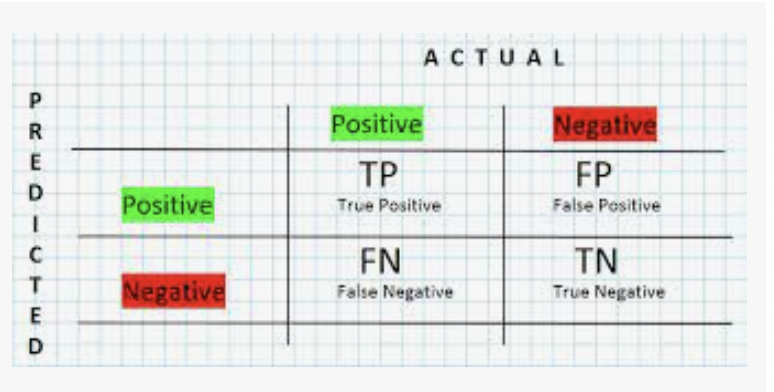

In the following result the TP, FP, FN and TN adds up to give the total count of test set.

In [ ]:
confusion_matrix(y_test,y_pred) 

array([[ 89,  28],
       [ 29, 104]])

In [ ]:
pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,89,28,117
1,29,104,133
All,118,132,250


#Deploying model

In [ ]:
import pickle #converts the python object into stream of charcters and store them in the disk
pickle.dump(tfidf, open('tfidf-transform.pkl', 'wb')) #storing the character stream in a file onto the disk
filename = 'restaurant-review.pkl'
pickle.dump(text_model, open(filename, 'wb'))

In [ ]:
%%writefile app.py
import numpy as np
import pickle
import pandas as pd
#from flasgger import Swagger
import streamlit as st 

from PIL import Image

#app=Flask(__name__)
#Swagger(app)
filename = 'restaurant-review.pkl'
classifier = pickle.load(open(filename, 'rb'))
tfidf = pickle.load(open('tfidf-transform.pkl','rb'))


#@app.route('/')
def welcome():
    return "Welcome All"

#@app.route('/predict',methods=["Get"])
def predict_note(message):
    
    data = [message]
    vect = tfidf.transform(data).toarray()
    prediction=classifier.predict(vect)
    print(prediction)
    return prediction



def main():
    st.title("Restaurant Review Classifier")
    st.subheader('TFIFD Vectorizer')     
    st.write('This project is based on Naive Bayes Classifier')
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Restaurant Review Classifier ML App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    message = st.text_area("Enter Text","Type Here ..")
    
    result=""
    if st.button("Predict"):
        result=predict_note(message)
    st.success('The output is {}'.format(result))

if __name__=='__main__':
    main()

Overwriting app.py


In [ ]:
!pip install streamlit #Streamlit is an open source app framework in Python language. It helps us create web apps for data science and machine learning in a short time.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!streamlit run app.py

2022-09-22 14:55:56.257 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.87.33:8501

  Stopping...
  Stopping...


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port='8501')
url

<NgrokTunnel: "http://5ba4-34-125-87-33.ngrok.io" -> "http://localhost:80">